<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Exploratory Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 1: Exploratory Analysis</span>!

Remember, the goal of this step is to "get to know" the data. 
* Think of it like a "first date." 
* Try to learn as much about the data as possible, but don't invest too much time and get stuck on this step.
* You'll probably need to do ad-hoc data exploration later anyway, so you don't need to be 100% comprehensive right now.

Exploratory analysis for machine learning should be **quick, efficient, and decisive**. We'll go through most of the same steps that we took in Project 2, but we'll also introduce something new.

<br><hr id="toc">

### In this module...

In this module, we'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Advanced segmentations](#advanced-segmentations) (This is different from Project 2)


This time, however, you'll be in the driver's seat.
<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

<br>
**Starting from this project, we'll have you identify which libraries to import.**
* Up to now, we've taken care of this for you so you could focus on the actual machine learning.
* However, getting familiar with importing libraries is actually pretty important.
* **Tip:** If you forget one, you can always add it here later and re-run this code block.
* Check the answer key if needed (or better yet, review Project 2).

We've provided comments for guidance.

In [45]:
# print_function for compatibility with Python 3

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 
# Seaborn for easier visualization
import seaborn as sns

Next, let's import the dataset.
* The file path is <code style="color:crimson">'project_files/employee_data.csv'</code>

In [2]:
# Load employee data from CSV
df = pd.read_csv('project_files/employee_data.csv')

Now we're ready to jump into exploring the data!

<span id="basic"></span>
# 1. Basic information

Let's begin by displaying the dataset's basic information.

<br>
**First, display the <span style="color:royalblue">dimensions</span> (a.k.a. shape) of the dataset.**

In [5]:
# Dataframe dimensions
print(df.shape)
print(df.head())

(14249, 10)
   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  


**Next, display the <span style="color:royalblue">datatypes</span> of the features.**
* Which are the **numeric** features?
* Which are the **categorical** features?

In [6]:
# Column datatypes
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

**Next, display the first 10 <span style="color:royalblue">example observations</span> from the dataset.**
* Remember, the purpose is not to perform rigorous analysis. 
* Instead, it's to get a **qualitative "feel"** for the dataset.

In [8]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


**Finally, display the last 10 rows of data to check for any signs of <span style="color:royalblue">corrupted data</span>.**
* Corrupted data will usually appear as a bunch of gibberish. It will be obvious.
* Most of the time, you won't have corrupted data... but this is still a quick and easy check.

In [9]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="numeric"></span>
# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

<br>
**First, plot the Pandas <span style="color:royalblue">histogram grid</span> for all the numeric features.** 

Feel free to mess around with the settings and formatting, but here are the settings we used for reference:
* We made the figure size 10x10
* We also rotated x-labels by -45 degrees
* Finally, we cleared the text "residue" and just kept the plot.

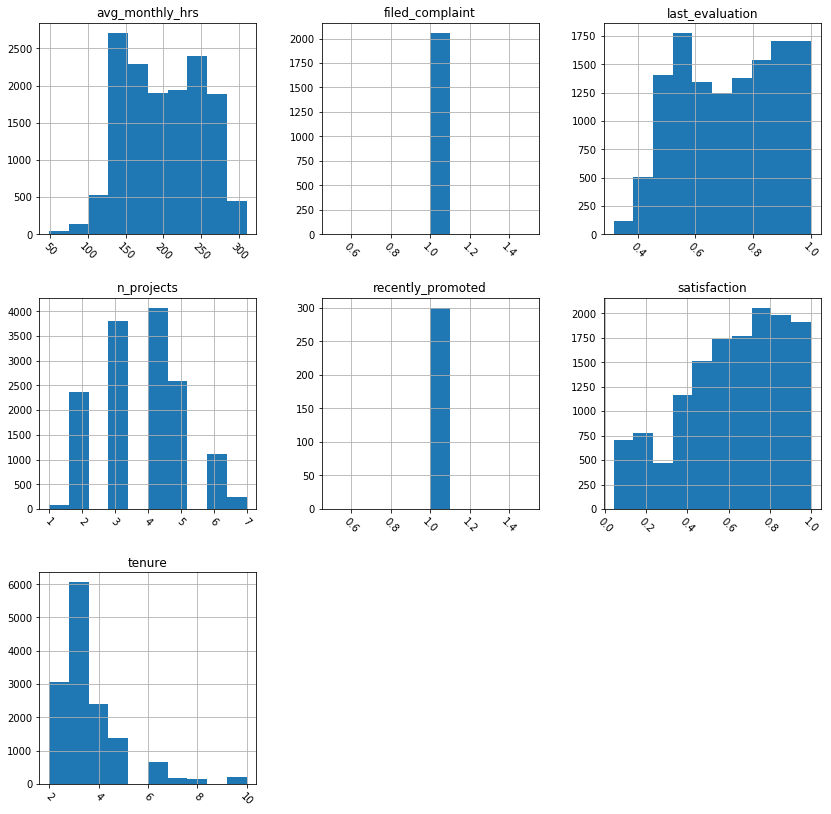

In [10]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

**Next, display formal <span style="color:royalblue">summary statistics</span> for the numeric features.**

In [35]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="categorical"></span>
# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.

<br>
**First, display the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.**

In [69]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


**Using a loop, display <span style="color:royalblue">bar plots</span> for each of the categorical features.**

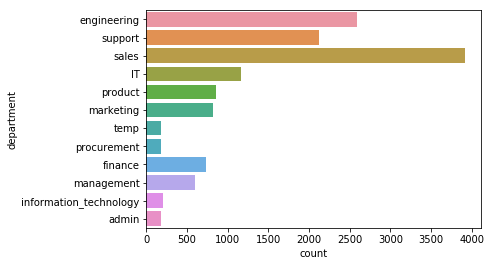

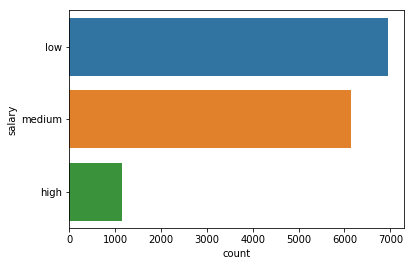

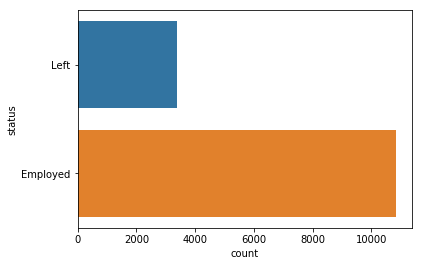

In [46]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index :
    sns.countplot(y=feature, data=df)
    plt.show()

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="segmentations"></span>
# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

**First, display a <span style="color:royalblue">violin plot</span> with <code style="color:steelblue">'status'</code> on the y-axis and <code style="color:steelblue">'satisfaction'</code> on the x-axis.**

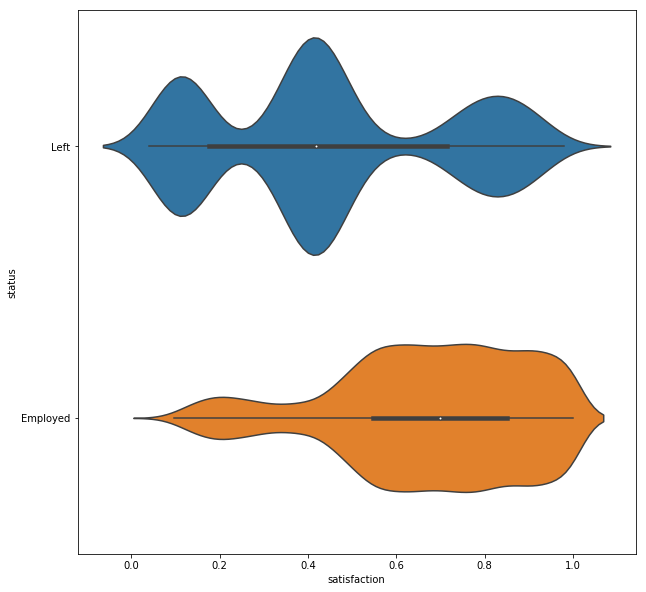

In [50]:
# Segment satisfaction by status and plot distributions
plt.subplots(figsize=[10,10])
sns.violinplot(x='satisfaction', y='status', data=df)
plt.show()

**Next, display a violin plot that segments <code style="color:steelblue">'last_evaluation'</code> by <code style="color:steelblue">'status'</code>.**

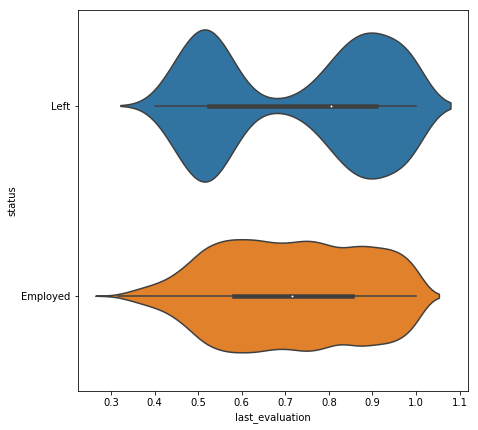

In [54]:
# Segment last_evaluation by status and plot distributions
# plt.subplots(figsize=[10,10])
plt.figure(figsize=(7,7))
sns.violinplot(x='last_evaluation', y='status', data=df)
plt.show()

**<span style="color:royalblue">Group by</span> <code style="color:steelblue">'status'</code> and calculate the average value of each feature within each class.**

In [52]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="advanced-segmentations"></span>
# 5. Advanced segmentations

Because the target variable is categorical, it can often be helpful to expand your segmentation analysis. 

<br>
**Now, we'll see how to do bivariate segmentations, which can be produced with the <code style="color:steelblue">sns.lmplot()</code> function from the Seaborn library.**
* <code style="color:steelblue">sns.lmplot()</code> is essentially a regular **scatterplot** with additional options.
* For example, we can color each point based on its <code style="color:steelblue">'status'</code>.
* To do so, we'll use the <code style="color:steelblue">hue=</code> argument.

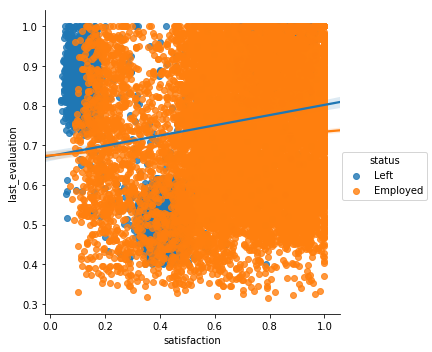

In [61]:
# Scatterplot of satisfaction vs. last_evaluation
#correlations = df.corr()
#sns.heatmap(correlations, cmap="RdBu", center = 0,linewidth=.5)
sns.lmplot(x='satisfaction', y='last_evaluation',hue='status',data=df)


**Plot another scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code>, but only for employees who have <code style="color:crimson">'Left'</code>.**
* **Hint:** Do you still need the <code style="color:steelblue">hue=</code> argument?
* **Hint:** How might you change the <code style="color:steelblue">data=df</code> argument?

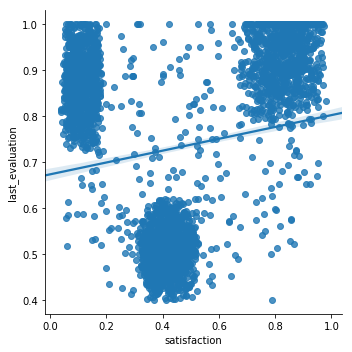

In [66]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation',data=df[df['status']=='Left']) #df.status=='Left'

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br>
## Next Steps

Congratulations for making through Project 3's Exploratory Analysis!

Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'status'</code>.
* And you dove into some advanced, bivariate segmentations.

As you work through the next module, <span style="color:royalblue">Module 2: ABT Construction</span>, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data and engineer features.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>